<font size=8><center> Capstone Navantia - EDA</font></br>

<center><img src="https://www.softwareone.com/-/media/global/social-media-and-blog/hero/implementing-artificial-intelligence-part-1-hero.jpg?rev=56ebf75efd06466786861433a1cae008&sc_lang=es-es&hash=156019D8878E348531B101651625C76A" width=900>

# 1. Setup

In [ ]:
import matplotlib.pyplot as plt
import cv2
import json
import random
import numpy as np
import os
import pandas as pd
from PIL import Image
import time
import shutil
import sklearn.model_selection as model_selection

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ny3g4ZIR8JLlIGGc8uX6")
project = rf.workspace("capstone-project-ie").project("capstone-nv")
dataset = project.version(17).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=54cc591b056c63d4adbad6bee60167d5caaee10a64228e1ad3a4ed7d250ccfcd
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Capstone-NV-17 in coco:: 100%|██████████| 8042/8042 [00:02<00:00, 3265.21it/s]


FileNotFoundError: ignored

In [ ]:
# Create annotations paths
train = "/content/Capstone-NV-17/train/"
valid = "/content/Capstone-NV-17/valid/"

train_annot = "/content/Capstone-NV-17/train/_annotations.coco.json"
valid_annot = "/content/Capstone-NV-17/valid/_annotations.coco.json"

# 2. Visualize

In [ ]:
# Create a function to vizualize randomly 5 images from the dataset

def visualize(path):
  # Load the dataset
  with open(path) as f:
      data = json.load(f)

  # Select the number of images you want to visualize
  num_images = 5

  # Create a list of image ids to select from
  image_ids = [image["id"] for image in data["images"]]

  # Randomly select the image ids
  random_image_ids = random.sample(image_ids, num_images)

  # Iterate through the selected number of images
  for image_id in random_image_ids:
      # Get the image file path
      img_path = [image["file_name"] for image in data["images"] if image["id"] == image_id][0]
      # Load the image
      img = cv2.imread(img_path)
      # Get the annotations for the image
      annotations = [ann for ann in data['annotations'] if ann['image_id'] == image_id]
      # Iterate through each annotation in the image
      for annotation in annotations:
          # Get the bounding box coordinates
          xmin = annotation["bbox"][0]
          ymin = annotation["bbox"][1]
          width = annotation["bbox"][2]
          height = annotation["bbox"][3]
          xmax = xmin + width
          ymax = ymin + height
          # Draw the bounding box on the image
          cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 8)
          # Add the class label to the image
          class_id = annotation["category_id"]
          class_label = data["categories"][class_id]["name"]
          cv2.putText(img, class_label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
      # Display the image
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.show()

## 2.1 Train

/content/Capstone-NV-17/train


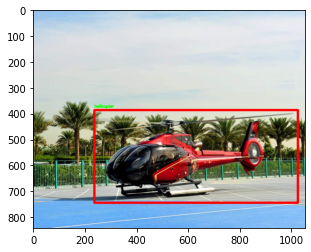

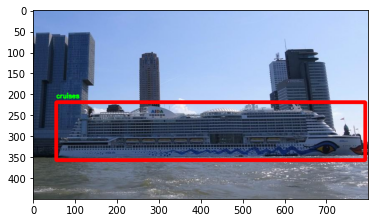

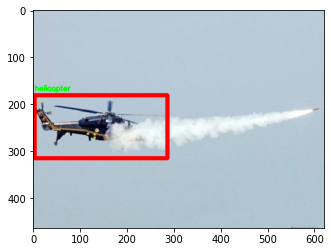

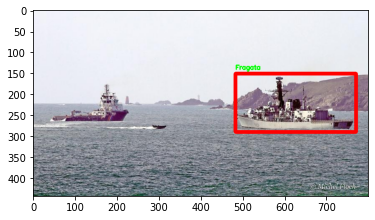

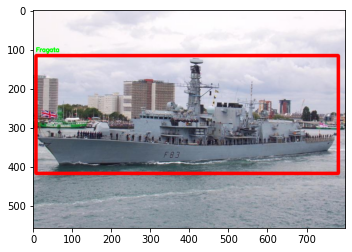

In [ ]:
%cd /content/Capstone-NV-17/train
visualize(train_annot)

## 2.1 Valid

/content/Capstone-NV-17/valid


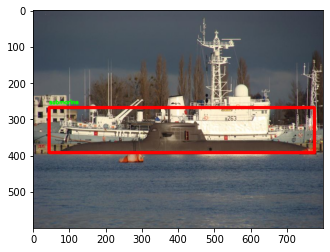

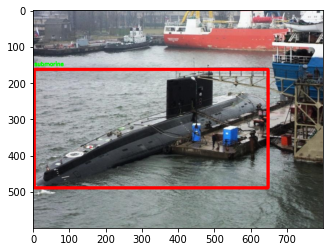

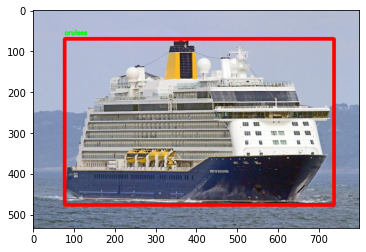

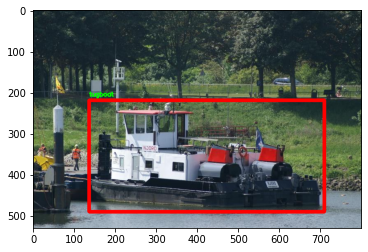

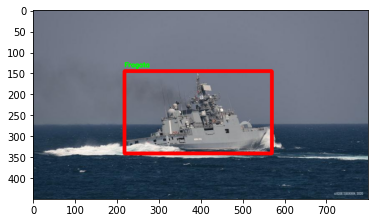

In [ ]:
%cd /content/Capstone-NV-17/valid
visualize(valid_annot)

We can see that the last image was not labelled correctly meaning that labelling will need to be reviewed.

# 3. Size Distribution

In [ ]:
# Create a function to check size distribution

def size_distribution(annotations, path):
  # Load the dataset
  with open(annotations) as f:
      data = json.load(f)

  # Initialize variables for storing image properties
  widths = []
  heights = []
  aspect_ratios = []

  # Iterate through each image in the dataset
  for image in data['images']:
      # Get the image file path
      img_path = path + image["file_name"]
      # Load the image
      img = cv2.imread(img_path)
      # Get the image width and height
      height, width, _ = img.shape
      # Append the width and height to the corresponding lists
      widths.append(width)
      heights.append(height)
      # Calculate the aspect ratio
      aspect_ratios.append(float(width) / float(height))

  # Plot histograms to visualize the distribution of image properties
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.hist(widths)
  plt.title("Distribution of Image Widths")
  plt.xlabel("Width")
  plt.ylabel("Frequency")

  plt.subplot(132)
  plt.hist(heights)
  plt.title("Distribution of Image Heights")
  plt.xlabel("Height")
  plt.ylabel("Frequency")

  plt.subplot(133)
  plt.hist(aspect_ratios)
  plt.title("Distribution of Image Aspect Ratios")
  plt.xlabel("Aspect Ratio")
  plt.ylabel("Frequency")
  plt.show()

## 3.1 Train

/content/Capstone-NV-17/train


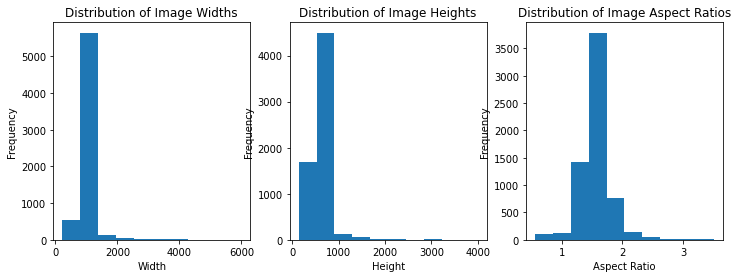

/content/Capstone-NV-17/valid


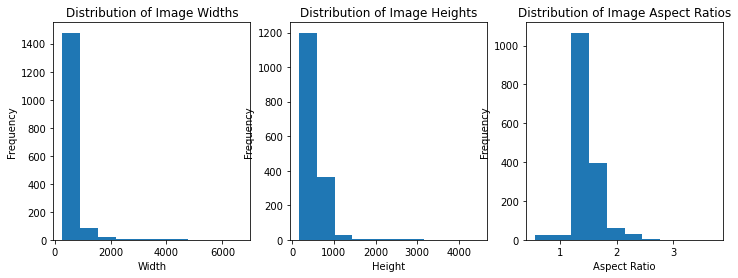

In [ ]:
%cd /content/Capstone-NV-17/train
size_distribution(train_annot, train)
%cd /content/Capstone-NV-17/valid
size_distribution(valid_annot, valid)

# 4. Class Distribution

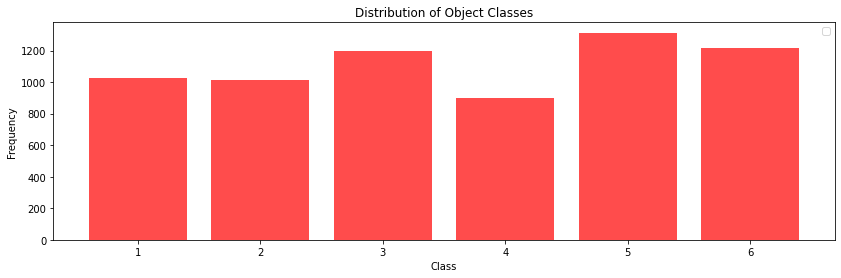

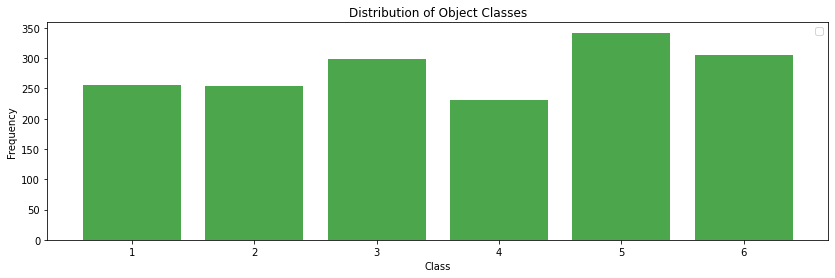

In [ ]:
def class_distribution(annotations, color):
  # Initialize variables for storing object class information
  classes = {}

  # Import annotations in json
  with open(annotations) as f:
    annotations = json.load(f)

  # Iterate through each annotation in the dataset
  for annotation in annotations["annotations"]:
      # Get the class label
      label = annotation["category_id"]
      # Check if the class has already been encountered
      if label in classes:
          # If yes, increment the count
          classes[label] += 1
      else:
          # If not, add the class to the dictionary with a count of 1
          classes[label] = 1

  # Plot a bar chart to visualize the distribution of object classes
  plt.figure(figsize=(14,4))
  plt.bar(classes.keys(), classes.values(), color=color, alpha=0.7)
  plt.title("Distribution of Object Classes")
  plt.xlabel("Class")
  plt.ylabel("Frequency")
  plt.legend()


class_distribution(train_annot, 'red')
class_distribution(valid_annot, 'green')
plt.show()

# 5. Bounding Boxes Distribution

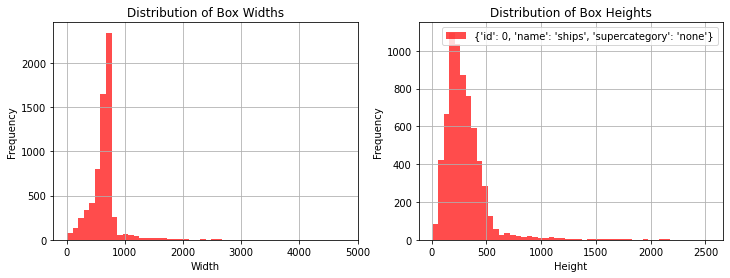

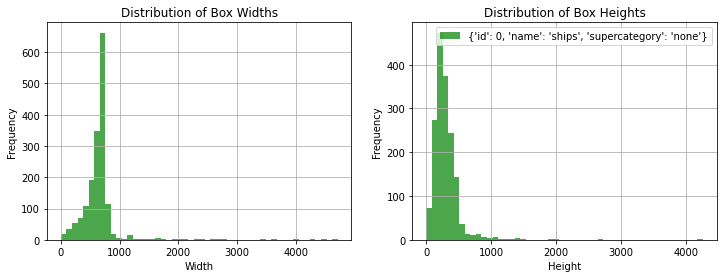

In [ ]:
def bbox_distribution(annotations, color):

  # Import annotations in json
  with open(annotations) as f:
    annotations = json.load(f)
  
  # Initialize variables for storing box properties
  box_widths = []
  box_heights = []

  # Iterate through each annotation in the dataset
  for annotation in annotations["annotations"]:
      # Get the bounding box coordinates
      xmin, ymin, width, height = annotation["bbox"]
      # Append the width and height to the corresponding lists
      box_widths.append(width)
      box_heights.append(height)

  # Plot histograms to visualize the distribution of box properties
  plt.figure(figsize=(12,4))
  plt.subplot(121)
  plt.hist(box_widths, bins=50, color=color, alpha=0.7, label=annotations["categories"])
  plt.title("Distribution of Box Widths")
  plt.xlabel("Width")
  plt.ylabel("Frequency")
  plt.grid(True)

  plt.subplot(122)
  plt.hist(box_heights, bins=50, color=color, alpha=0.7, label=annotations["categories"])
  plt.title("Distribution of Box Heights")
  plt.xlabel("Height")
  plt.ylabel("Frequency")
  plt.grid(True)
  plt.legend()

bbox_distribution(train_annot, 'red')
bbox_distribution(valid_annot, 'green')
plt.show()